<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Filter-an-array-by-value-(Mask-indexing)" data-toc-modified-id="Filter-an-array-by-value-(Mask-indexing)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Filter an array by value (Mask indexing)</a></span></li><li><span><a href="#ND-array-wrangling" data-toc-modified-id="ND-array-wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ND array wrangling</a></span></li><li><span><a href="#For-loop-and-Vectorized-Computing" data-toc-modified-id="For-loop-and-Vectorized-Computing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>For-loop and Vectorized Computing</a></span><ul class="toc-item"><li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Broadcasting</a></span></li><li><span><a href="#Apply-operation-along-(multi)-axis" data-toc-modified-id="Apply-operation-along-(multi)-axis-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Apply operation along (multi) axis</a></span></li><li><span><a href="#Matrix-(vector)-Multiplication" data-toc-modified-id="Matrix-(vector)-Multiplication-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Matrix (vector) Multiplication</a></span></li></ul></li><li><span><a href="#Basics-for-Optimization-(as-in-MLE)" data-toc-modified-id="Basics-for-Optimization-(as-in-MLE)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Basics for Optimization (as in MLE)</a></span></li></ul></div>

# Conceptual Review for HW1

In a neural system scenario, we want to know what the neurons "care about" in the environment. 

* Problem 1, Auditory cortex neuron ~ auditory input. 
* Problem 2, Medial Entorhinal Cortex neurons ~ 

> What's our toolkit to know what the neurons care about?

* **Spike Triggered Average**
* **Neural encoding models: Linear Non-linear Poisson**
* Neural decoding models: Linear classifiers etc.

# Some Numpy Tricks for HW1

In [8]:
import numpy as np
import matplotlib.pylab as plt

## Filter an array by value (Mask indexing)

In [ ]:
A = np.array([5,2,3,7,9,10])

In [ ]:
A[[True, False, True, False, True, False]] # use boolean masks as index

In [ ]:
A > 5 # You can generate boolean mask with these simple element-wise operations. 

In [ ]:
(A > 5) & (A < 8) # Masks can also under go element-wise operation. 

In [ ]:
A[(A > 5) & (A < 8)]

## ND array wrangling

## For-loop and Vectorized Computing

> It's a paradigm shift to convert loops to [vectorized computing.](https://en.wikipedia.org/wiki/Array_programming)

" for each time bin average xxx " 

" for each neuron calculate its kernel " 

> In numpy and matlab, vectorized computation runs much faster.

Which is faster?
* `np.array([sum(val for val in row) for row in A]);`
* `np.array([sum(row) for row in A]);`
* `np.array([row.sum() for row in A]);`
* `A.sum(axis=1);`

In [77]:
A = np.random.randn(100,100)

In [84]:
%%timeit
np.array([sum(val for val in row) for row in A]);

2.45 ms ± 49.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [83]:
%%timeit
np.array([sum(row) for row in A]);

2.2 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [81]:
%%timeit
np.array([row.sum() for row in A]);

235 µs ± 9.09 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [82]:
%%timeit
A.sum(axis=1)

7.73 µs ± 308 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Some operations are easier to be vectorized; some easier to conduct in a for loop. Which is which ?
* Find the spike times falling in each of the time bins (Histogram)
* Average spike number for eahc time bins across all the trials. 

*Inefficient* code is OK when it's **run only once** or **only on small scaled data**. 

Take care for efficiency when writing core computation code (e.g. in optimization) 

Two conceptual tools to think about
* What operation is applied to each element / each row / each plain? (**broadcasting**)
    * Can these operations be reduced to simple element-wise operations? 
* What operation is applied to compress / consume / along each row?  (**Across**)

### Broadcasting 

Basic operations directly broadcast to each element in an array
* `+,-,*,/,**`
* Basic math `log,exp,sin,cos,sqrt`
* Boolean operations `<,>,==,&,|`
* etc.

In [90]:
V = np.random.randn(1000)
%timeit U = V - 0.8
%timeit U = [v - 0.8 for v in V]

1.25 µs ± 167 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
273 µs ± 6.61 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [91]:
V = np.random.randn(1000)
%timeit U = np.sin(V)
%timeit U = [np.sin(v) for v in V]

8.17 µs ± 191 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.45 ms ± 24.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
A = np.random.randn(100,100)

> Seemingly complex expression can be decomposed into element-wise vectorized computation! 

**Example**: what if I want to plot a Mexican hat?
$$ D=\sqrt{x^2+y^2}$$
$$ z= 16 - D^2\;\; if\;\; D<4\; \\ 5*(D^{0.5}-2)\;\; else $$ 

In [ ]:
XX, YY = np.meshgrid(np.linspace(-8,8,51), np.linspace(-8,8,51))
...

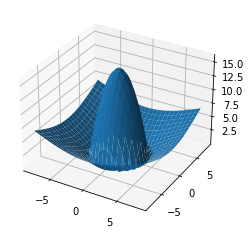

In [118]:
XX, YY = np.meshgrid(np.linspace(-8,8,51), np.linspace(-8,8,51))
D2 = XX**2 + YY**2
D = np.sqrt(XX**2 + YY**2)
ZZ = (16 - D2) * (D <  4) +\
    5*(D**(1/2) - 2) * (D >= 4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX, YY, ZZ)

In [135]:
%%timeit
D2 = XX**2 + YY**2
# D = np.sqrt(XX**2 + YY**2)
ZZ = (16 - D2) * (D2 < 16) +\
    5*(D2**(1/4) - 2) * (D2 >= 16)

125 µs ± 1.83 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [153]:
%%timeit
def funcZ(x,y):
    D2 = x**2 + y**2
    Z = (16 - D2) if D2 < 16 else  5*(D2**(1/4) - 2)
    return Z

ZZ = np.array(list(map(funcZ, XX.flatten(), YY.flatten())))
ZZ = ZZ.reshape(XX.shape)

5.15 ms ± 66.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [155]:
%%timeit
ZZ = np.array([
    [funcZ(XX[i,j], YY[i,j]) for j in range(XX.shape[1])] 
        for i in range(XX.shape[0])])

6.06 ms ± 188 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Example**: Differentiate a function in an array (finite difference of a sequence) 
$$\frac{df}{dt}\approx \frac{f_{t+1} -f_{t}}{\Delta t}$$

In [119]:
xvals = np.linspace(0,10,1000)
fvals = np.sin(xvals) ** 2

In [124]:
dfvals = (fvals[1:] - fvals[:-1])/(xvals[1:]-xvals[:-1])
dfvals = np.append(dfvals,dfvals[-1])

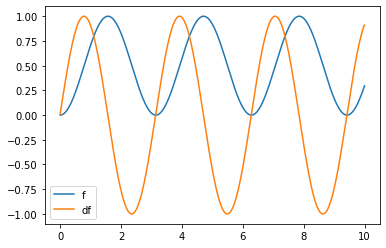

In [126]:
plt.figure()
plt.plot(xvals,fvals, label='f')
plt.plot(xvals,dfvals, label='df')
plt.legend()
plt.show()

### Apply operation along (multi) axis

In [89]:
# Assume we have an array of 3 axes 
B = np.random.randn(2000, 36, 20) # neurons by time by trial

In [87]:
#note the axis, keepdims args
np.mean?

In [88]:
np.std?

In [ ]:
B.mean(axis=(0, 2))

### Matrix (vector) Multiplication

In [ ]:
np.dot 

In [ ]:
np.matmul 

In [ ]:
@ 

In [ ]:
* 

## Basics for Optimization (as in MLE)

**Keypoints**: 
* What's the intuition behind minimization? 
* How to debug optimization process / monitor it? 

In [4]:
from scipy.optimize import minimize

In [6]:
minimize?

In [15]:
def func(x):
    return np.sum(np.cos(x)**2)

In [16]:
minimize(func, [0,1])

      fun: 1.0000000000022091
 hess_inv: array([[1.00000000e+00, 3.76431109e-06],
       [3.76431109e-06, 5.00326837e-01]])
      jac: array([-7.59959221e-07, -3.05473804e-06])
  message: 'Optimization terminated successfully.'
     nfev: 20
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([3.74650016e-07, 1.57079479e+00])

In [73]:
def plot_optim_traj(func, x_col, f_col): 
    XX, YY = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
    x_arr = np.array(x_col)
    plt.figure(figsize=[12,10])
    if len(x_col)!=0 and len(f_col)!=0:
        plt.plot(x_arr[:,0], x_arr[:,1], c="r", lw=1.5, alpha=0.5)
    fvals = [[func([XX[i,j], YY[i,j]], False) for j in range(XX.shape[1])] for i in range(XX.shape[0])]
    plt.contour(XX, YY, fvals, 20)
    plt.colorbar()
    plt.axis("image")
    plt.show()

def print_optim_traj(x_col, f_col):
    for i, (xi, fval) in enumerate(zip(x_col, f_col)):
        print(f"Step {i} {xi} f={fval}")

      fun: 1.769920786611431e-12
 hess_inv: array([[ 0.5043461 , -0.00302001],
       [-0.00302001,  0.50222394]])
      jac: array([ 2.44707053e-06, -1.06409621e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([-1.57079511,  1.57079579])


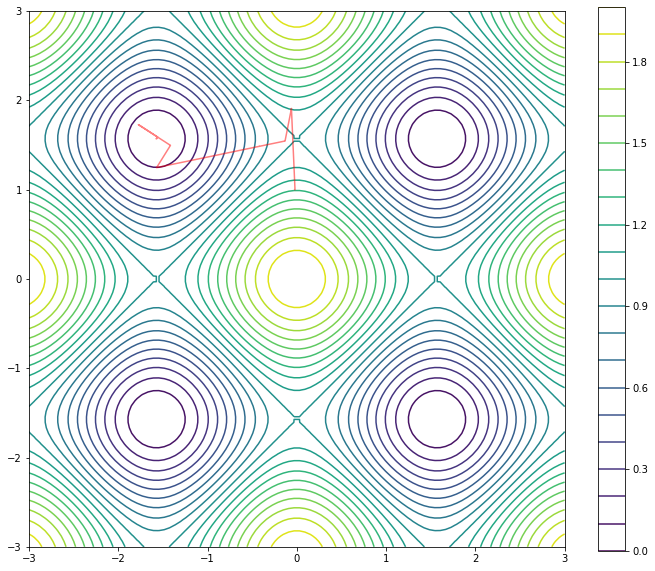

In [67]:
x_col = []
f_col = []
def func(x, record=True):
    fval = np.sum(np.cos(x)**2)
    if record:
        x_col.append(x)
        f_col.append(fval)
    return fval

res = minimize(func, [-0.02,1])
print(res)
plot_optim_traj(func, x_col, f_col)

      fun: 2.2994980125799095e-08
 hess_inv: array([[2.40406095e+02, 4.64159986e-04],
       [4.64159986e-04, 4.99392299e-01]])
      jac: array([-7.46937014e-06,  2.94925726e-08])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([-1.23142583e-02,  7.29570571e-09])


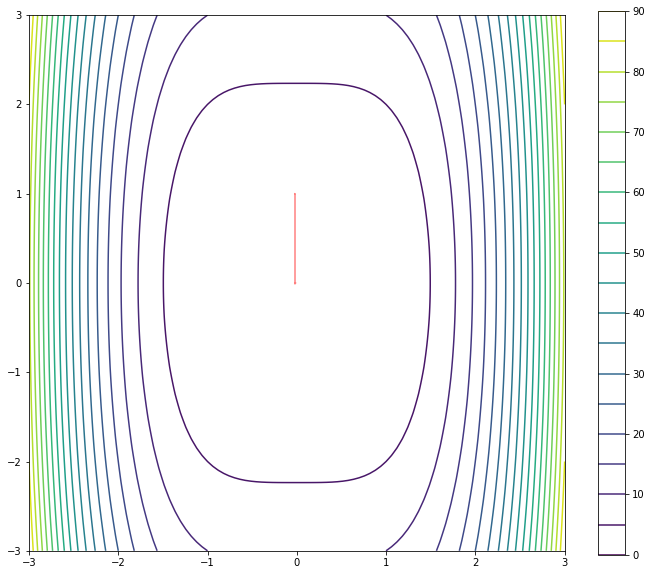

In [68]:
x_col = []
f_col = []
def func(x, record=True):
    fval = x[0]**4 + x[1] **2
    if record:
        x_col.append(x)
        f_col.append(fval)
    return fval

res = minimize(func, [-0.02,1])
print(res)
plot_optim_traj(func, x_col, f_col)

      fun: -1.5368642038582157e+26
 hess_inv: array([[ 1.01821732, -0.07157976],
       [-0.07157976,  0.50057795]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 92
      nit: 3
     njev: 23
   status: 0
  success: True
        x: array([-5.35646780e+08,  3.78111159e+07])


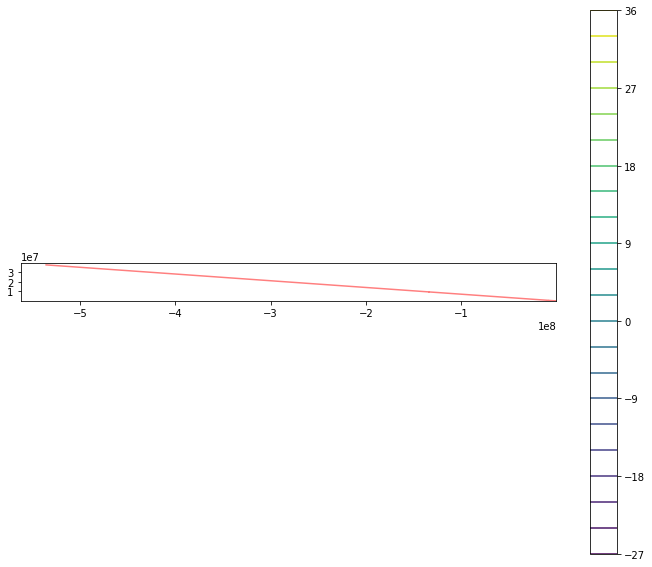

In [74]:
x_col = []
f_col = []
def func(x, record=True):
    fval = x[0]**3 + x[1] **2 # Note this function is unbounded! 
    if record:
        x_col.append(x)
        f_col.append(fval)
    return fval

res = minimize(func, [-0.02,1])
print(res)
plot_optim_traj(func, x_col, f_col)

In [70]:
print_optim_traj(x_col, f_col)

Step 0 [-0.02  1.  ] f=0.999992
Step 1 [-0.02  1.  ] f=0.999992
Step 2 [-0.01999999  1.        ] f=0.9999920000178814
Step 3 [-0.02        1.00000001] f=0.9999920298023226
Step 4 [-0.020606   -0.00999982] f=9.124690879743276e-05
Step 5 [-0.020606   -0.00999982] f=9.124690879743276e-05
Step 6 [-0.02060598 -0.00999982] f=9.124692777883953e-05
Step 7 [-0.020606  -0.0099998] f=9.124661077984898e-05
Step 8 [-2.18730895e-02 -4.35903329e-07] f=-1.0464786684150126e-05
Step 9 [-2.18730895e-02 -4.35903329e-07] f=-1.0464786684150126e-05
Step 10 [-2.18730746e-02 -4.35903329e-07] f=-1.0464765296585728e-05
Step 11 [-2.18730895e-02 -4.21002168e-07] f=-1.0464786696919014e-05
Step 12 [-0.02333459  0.00010273] f=-1.2695207896722347e-05
Step 13 [-0.02333459  0.00010273] f=-1.2695207896722347e-05
Step 14 [-0.02333458  0.00010273] f=-1.269518355554627e-05
Step 15 [-0.02333459  0.00010275] f=-1.2695204834874182e-05
Step 16 [-0.02918061  0.0005154 ] f=-2.458188160180206e-05
Step 17 [-0.02918061  0.0005154 ] 

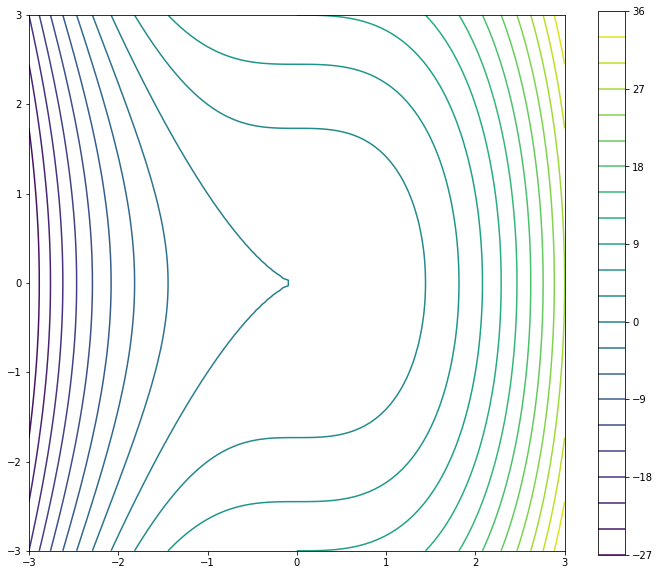

In [76]:
plot_optim_traj(func, [], [])